In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [122]:
df = pd.read_csv('clevBinary.csv', delimiter=',')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [123]:
df['num'].value_counts()


0    160
1    137
Name: num, dtype: int64

array([[<AxesSubplot:title={'center':'fbs'}>]], dtype=object)

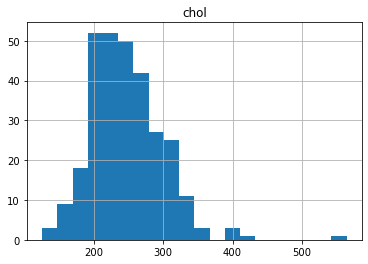

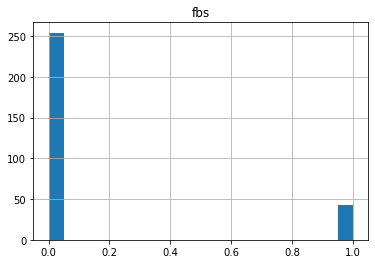

In [124]:
df.hist(column='chol', bins=20, )
df.hist(column='fbs', bins=20, )

In [125]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [126]:
X = df[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']] .values  #.astype(float)
X[0:5]

array([[ 63. ,   1. ,   1. , 145. , 233. ,   1. ,   2. , 150. ,   0. ,
          2.3,   3. ,   0. ,   6. ],
       [ 67. ,   1. ,   4. , 160. , 286. ,   0. ,   2. , 108. ,   1. ,
          1.5,   2. ,   3. ,   3. ],
       [ 67. ,   1. ,   4. , 120. , 229. ,   0. ,   2. , 129. ,   1. ,
          2.6,   2. ,   2. ,   7. ],
       [ 37. ,   1. ,   3. , 130. , 250. ,   0. ,   0. , 187. ,   0. ,
          3.5,   3. ,   0. ,   3. ],
       [ 41. ,   0. ,   2. , 130. , 204. ,   0. ,   2. , 172. ,   0. ,
          1.4,   1. ,   0. ,   3. ]])

In [127]:
y = df['num'].values
y[0:5]

array([0, 1, 1, 0, 0], dtype=int64)

In [128]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.93618065,  0.69109474, -2.24062879,  0.75038004, -0.27644339,
         2.43042728,  1.01019851,  0.01749443, -0.69641941,  1.06896529,
         2.26414539, -0.72197605,  0.65587737],
       [ 1.3789285 ,  0.69109474,  0.87388018,  1.59626645,  0.74455507,
        -0.41145029,  1.01019851, -1.81633388,  1.43591632,  0.38177332,
         0.6437811 ,  2.47842525, -0.89422007],
       [ 1.3789285 ,  0.69109474,  0.87388018, -0.65943064, -0.35349988,
        -0.41145029,  1.01019851, -0.89941972,  1.43591632,  1.32666228,
         0.6437811 ,  1.41162482,  1.17257652],
       [-1.94168041,  0.69109474, -0.16428947, -0.09550637,  0.05104668,
        -0.41145029, -1.00341866,  1.63300986, -0.69641941,  2.09975324,
         2.26414539, -0.72197605, -0.89422007],
       [-1.49893255, -1.44697961, -1.20245913, -0.09550637, -0.83510292,
        -0.41145029,  1.01019851,  0.97807117, -0.69641941,  0.29587432,
        -0.97658319, -0.72197605, -0.89422007]])

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (237, 13) (237,)
Test set: (60, 13) (60,)


In [130]:
from sklearn.neighbors import KNeighborsClassifier


In [131]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [132]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [133]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8860759493670886
Test set Accuracy:  0.85


In [134]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))


[0.81666667 0.86666667 0.83050847 0.86440678 0.77966102]
cv_scores mean:0.8315819209039548


In [135]:
##yhat_prob = neigh.predict_proba(X_test)
##fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat_prob[:,1], pos_label=1)

In [136]:
##fpr

In [137]:

fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat, pos_label=1)

(0.0, 1.0)

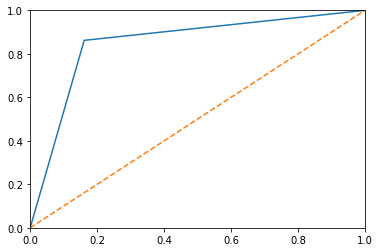

In [138]:
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle= '--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0, 1.0])

In [139]:
thresholds

array([2, 1, 0], dtype=int64)

In [140]:
yhat_prob = neigh.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat_prob[:,1], pos_label=1)

(0.0, 1.0)

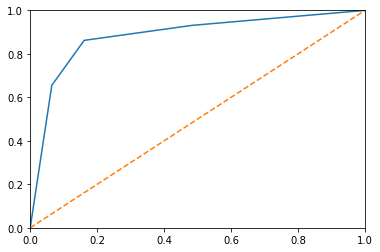

In [141]:
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle= '--')
plt.xlim([0.0 , 1.0])
plt.ylim([0.0, 1.0])